In [39]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4+3*X + np.random.rand(100, 1)

In [40]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.53016159],
       [2.94574312]])

In [59]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
# print(X_new)
# print(X_new_b)
y_predict


array([[ 4.53016159],
       [10.42164784]])

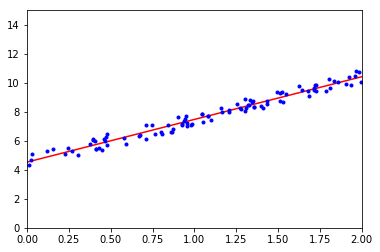

In [61]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.50833451]), array([[2.99650006]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.50833451],
       [10.50133463]])

In [75]:
# 4.GradientDescent

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.53016159],
       [2.94574312]])

In [83]:
# 4.Stochastic GradientDescent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
#         eta = 0.1
        theta = theta - eta * gradients
        
theta

array([[4.51466143],
       [2.95019093]])

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.43161931]), array([3.00491276]))